## <center>School Districts with Richer Kids Get More Public Funding</center>
This is the first of what I hope will become a series of posts on educational equity. 

For part I, I'm going to start with educational funding and I'm going to look at a simple linear regression of school funding against poverty rates. In the coming posts I plan to break down school budgets to highlight where  differences in funding are felt, adjust funding and poverty rates for differences in cost of living, adjust funding for the increased educational costs associated with poverty, use additional measures of income level outside of poverty rate, try to understand how these educational inequities can affect children as adults, and hopefully more if I can get to it. 

But for this short post, I will quickly examine the relationship between school funding and poverty rates. 

#### Import some stuff for the regression, reading data, and plots:

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline

#### Read the data

In [12]:
pov = pd.read_excel('../Data/poverty_by_district.xls')
rev = pd.read_excel('../Data/annual_survey.xls')

#### Some basic cleaning, creating the two features, removing outliers, and removing NAs (listwise)

In [13]:
pov[pov.columns[5]] = pd.to_numeric(pov[pov.columns[5]], errors="coerce")
pov[pov.columns[6]] = pd.to_numeric(pov[pov.columns[6]], errors="coerce")

rev.NAME = rev.NAME.str.lower()
pov.Name = pov.Name.str.lower()

rev.NAME = rev.NAME.str.strip()
pov.Name = pov.Name.str.strip()

pov['poverty_proportion'] = pov[pov.columns[6]] / pov[pov.columns[5]]

rev['rev_per_scholar'] = rev['TOTALREV'] / rev['ENROLL']

rev_pov = pd.merge(
    rev[['NAME', 'rev_per_scholar']],
    pov[['Name', pov.columns[7]]],
    left_on="NAME",
    right_on="Name",
    how="inner")

#Remove NA
rev_pov = rev_pov.dropna()

#Remove Outliers
rev_pov = rev_pov[
    rev_pov.rev_per_scholar < rev_pov.rev_per_scholar.quantile(0.95)]
rev_pov = rev_pov[
    rev_pov.rev_per_scholar > rev_pov.rev_per_scholar.quantile(0.05)]

#### Creating the model with statsmodels' ols function. and plotting the results with pyplot

                            OLS Regression Results                            
Dep. Variable:        rev_per_scholar   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     114.5
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           3.15e-26
Time:                        15:26:07   Log-Likelihood:                -7150.4
No. Observations:                2832   AIC:                         1.430e+04
Df Residuals:                    2830   BIC:                         1.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.5727      0

Text(0, 0.5, 'Funds per Student (thousands)')

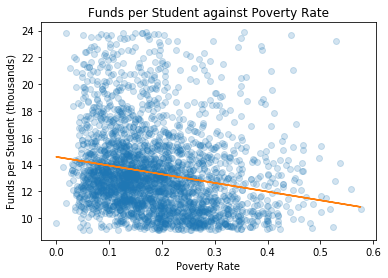

In [14]:
Y = rev_pov['rev_per_scholar']
X = rev_pov['poverty_proportion']

X = sm.add_constant(X)
mod = sm.OLS(Y, X)
reg = mod.fit()

print(reg.summary())

plt.figure(1)

plt.plot(X.poverty_proportion, Y, 'o', alpha=0.2)

plt.plot(X.poverty_proportion, reg.predict())

plt.title('Funds per Student against Poverty Rate')
plt.xlabel('Poverty Rate')
plt.ylabel('Funds per Student (thousands)')

Not surprisingly, their is a statistically significant, small negative relationship between funding and poverty rate. The poorer a district, the less money it gets. 

However, the difference is not as large as one might expect. (Of course the fact that one would expect those who need public educational funding the most to be getting significantly less, is extremely sad and speaks to the current reality of extreme income inequality in the U.S.) 

Still, a lot more analyses have to be done before we can take this data to mean much. For example, even a relatively small difference in funding might mean everything if the majority of every school's budges is always used by some massive annual costs (such as payroll). In such a case, even a relatively small difference might be 100% of the available funds for the additional programs that can make a world of a difference such as after-school programs, AP courses, etc.

## <center>Sources</center>


Data from the U.S. Census Bureau:

[Annual Survey of School System Finances](https://www.census.gov/programs-surveys/school-finances.html)


[SAIPE School District Estimates for 2016 ](https://www.census.gov/data/datasets/2016/demo/saipe/2016-school-districts.html)